# PARTE 2: Algoritmo Árvores de Decisão

Nesta segunda parte do Trabalho você irá aplicar os algoritmos de Árvore de Decisão e de Floresta Aleatória na base de dados de risco de crédito discutida em aula. Para isso você deve primeiramente importar as bibliotecas necessárias.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1 - Importação dos dados Pré-Processados

a) importe o arquivo salvo como 'risco_credito.pkl'



In [17]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

# 2 - Algoritmo de Árvore de Decisão



a) importar da biblioteca sklearn o pacote DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

b) Calcule a árvore de decisão, utilizando como critério a entropia.
Coloque como nome da variável: arvore_risco_credito

In [19]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.criterion = 'entropy'
arvore_risco_credito = decision_tree_classifier.fit(X_risco_credito, y_risco_credito)

c) Utilize o feature_importances_ para retornar a importância de cada atributo. Qual possui o maior ganho de informação?

Renda

In [20]:
arvore_risco_credito.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

d) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS: Adicione cores, nomes para os atributos e para as classes.

[Text(0.5555555555555556, 0.9166666666666666, 'x[3] <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.3333333333333333, 0.75, 'x[0] <= 1.5\n0.863\n7\n[5, 0, 2]'),
 Text(0.4444444444444444, 0.8333333333333333, 'True  '),
 Text(0.2222222222222222, 0.5833333333333334, 'x[3] <= 0.5\n1.0\n4\n[2, 0, 2]'),
 Text(0.1111111111111111, 0.4166666666666667, '0.0\n1\n[1, 0, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= 0.5\n0.918\n3\n[1, 0, 2]'),
 Text(0.2222222222222222, 0.25, '0.0\n1\n[0, 0, 1]'),
 Text(0.4444444444444444, 0.25, 'x[1] <= 0.5\n1.0\n2\n[1, 0, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, '0.0\n1\n[1, 0, 0]'),
 Text(0.5555555555555556, 0.08333333333333333, '0.0\n1\n[0, 0, 1]'),
 Text(0.4444444444444444, 0.5833333333333334, '0.0\n3\n[3, 0, 0]'),
 Text(0.7777777777777778, 0.75, 'x[0] <= 1.5\n1.149\n7\n[1, 5, 1]'),
 Text(0.6666666666666667, 0.8333333333333333, '  False'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[0] <= 0.5\n0.65\n6\n[1, 5, 

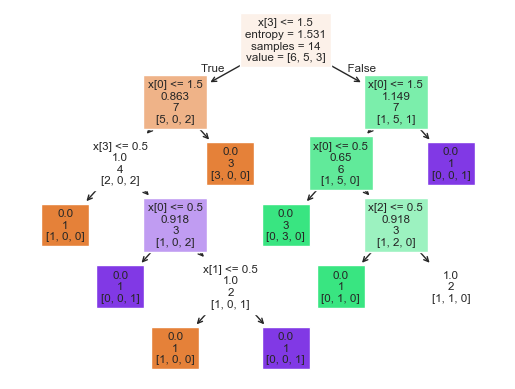

In [25]:
from sklearn import tree

rotulos = ['historia','divida','garantias','renda']
tree.plot_tree(arvore_risco_credito, filled=True, label='root')

e) FAZER A PREVISÃO

Utilize .predict para fazer a previsão realizada no exemplo em sala.

   i. história boa, dívida alta, garantia nenhuma, renda > 35

   ii. história ruim, dívida alta, garantia adequada, renda < 15


Verifique nos slides se seu resultado está correto!

#3 - Algoritmo de Árvore de Decisão para uma base de dados maior (Credit Data)

Nesta seção você deverá testar o uso da Árvore de Decisão para a Base de Dados Credit Risk Dataset. Aqui estaremos analisando os clientes que pagam (classe 0) ou não pagam a dívida (classe 1), a fim do banco conceder empréstimo.

In [ ]:
# abrir o arquivo
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

a) Ao abrir o arquivo utilize .shape para verificar o tamanho dos dados de treinamento e de teste

OBS: os dados de treinamento devem ter as seguintes dimenções: x=(1500, 3), y=(1500,); os dados de teste devem ter as seguintes dimenções: x=(500, 3), y=(500,)

b) Importe o pacote DecisionTreeClassifier do sklearn para treinar o seu algoritmo de árvore de decisão. Para poder refazer os testes e obter o mesmo resultado utilize o parâmetro random_state = 0.

c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

e) Faça a análise da Matriz de Confusão.

i. Quantos clientes foram classificados corretamente que pagam a dívida?

ii. Quantos clientes foram classificados incorretamente como não pagantes?

iii. Quantos clientes foram classificados corretamente que não pagam?

iv. Quantos clientes foram classificados incorretamente como pagantes?

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

f) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

g) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS 1: Os atributos previsores são = ['income', 'age', 'loan']

OBS 2: Adicione cores, nomes para os atributos e para as classes. Você pode utilizar a função fig.savefig para salvar a árvore em uma imagem .png

# Algoritmo Random Forest

Nesta seção iremos utilizar o algoritmo Random Forest para a mesma base de crédito (**Credit Risk Dataset**) - arquivo *credit.pkl*.

a) Importe o pacote RandomForestClassifier do sklearn para treinar o seu algoritmo de floresta randomica.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

b) Para gerar a classificação você deve adicionar alguns parâmetros:
*   n_estimators=10  --> número de árvores que você irá criar
*   criterion='entropy'
*   random_state = 0

c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões. O resultado foi melhor do que a árvore de decisão simples?

e) Se o resultado foi inferior, como você poderia resolver isso? Quais foram os resultados obtidos?

f) Faça a análise da Matriz de Confusão.

g) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?